# Tutorial 2: o "stack" científico do python



#### A whirlwind tour of the Python Scientific stack


![image](https://raw.githubusercontent.com/MARN-5895/Website/main/lectures/05_datavizandstack/img/SciPythonStack.png)


O conjunto científico Python (também conhecido como ecossistema científico Python) é um conjunto de bibliotecas, módulos e caixas de ferramentas amplamente utilizados em aplicações científicas. Veja a imagem acima, adaptada de Jake Vanderplas, representando o conjunto.

Todas essas ferramentas são construídas em cima do Python e algumas delas também envolvem código de linguagens compiladas, como C e Fortran. Os módulos científicos principais do Python incluem pacotes como IPython e Jupyter Lab para computação interativa, numpy para operações rápidas em matrizes, Cython para converter/calcula em C um código que é principalmente escrito em Python, numba para compilar partes de um código Python, e Dask para computação paralela. Construindo sobre essas ferramentas, existem muitas bibliotecas que os cientistas usam diariamente, como matplotlib para visualização de dados, scipy para operações numéricas eficientes, pandas para manipulação de dados tabulares e xarray para matrizes multidimensionais. Em cima dessas ferramentas, existem pacotes mais especializados, como scikit-learn para aprendizado de máquina e sympy para matemática simbólica. Pacotes mais especializados, que são específicos para um campo ou subdisciplina, constroem sobre todas as camadas internas.

Vamos aprender algumas dessas ferramentas nas próximas semanas. Por enquanto, abra um caderno em branco e dê o nome de "05_sciencestack.ipynb". Cesar vai trabalhar em uma rápida introdução ao numpy e scipy.



## numpy

In [76]:
# numpy para operações com arrays
import numpy as np

In [77]:
# gerador de números (pseudo) aleatórios
np.random.rand(10)  

array([0.26036948, 0.52767252, 0.98667283, 0.31872282, 0.9396327 ,
       0.37216168, 0.61946579, 0.08997631, 0.50237547, 0.9168528 ])

In [78]:
np.random.randn(10) # normally distributed

array([ 0.25525103,  0.59200727, -1.37701983,  0.5028776 ,  0.11308849,
        1.30888357, -1.3165684 ,  0.28778615, -0.97646618, -0.65844428])

In [79]:
# matemática básica (constantes e funções)
np.pi

3.141592653589793

In [80]:
np.cos(0), np.cos(np.pi)

(1.0, -1.0)

In [81]:
np.cos(np.arange(0,2*np.pi))

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029])

In [82]:
t = np.random.randn(10)
t

array([-0.03069253, -0.44983839,  0.50744564,  1.45127387, -1.19260611,
        0.642553  , -0.05996267,  0.72951783,  0.62371723,  0.22097869])

In [83]:
np.min(t)

-1.192606107596417

In [84]:
# t está em um array, que é um 'objeto' em python, portanto podemos fazer
t.min()

-1.192606107596417

In [85]:
t[t.argmax()]

1.4512738749724479

In [86]:
t.mean()  # média simples

0.24423865651197602

In [87]:
t.std()  # desvio padrão

0.6913247118427901

In [88]:
# gridagem  
x = np.arange(-np.pi,np.pi+.1,.1)
y = np.arange(-np.pi,np.pi+.1,.1)

In [89]:
x.shape, y.shape # x and y são arrays 1D

((64,), (64,))

In [90]:
X, Y = np.meshgrid(x,y)  

In [91]:
X.shape, Y.shape # X and Y são arrays 2D

((64, 64), (64, 64))

In [39]:
f = np.exp(-(X**2 + Y**2))

In [40]:
f.shape

(64, 64)

In [42]:
import matplotlib.pyplot as plt

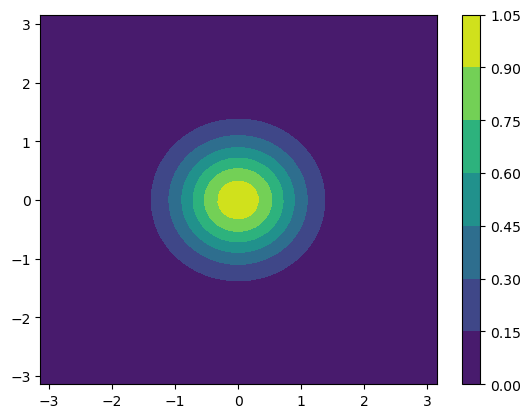

In [43]:
plt.contourf(X,Y,f)
plt.colorbar()

In [69]:
# simple interpolation
x = np.array([0,.4,.7,1.1,1.8,2.3,2.6,3.])
f = np.cos(x)

In [70]:
xi = np.arange(0,np.pi,.1)
fi = np.interp(xi,x,f)

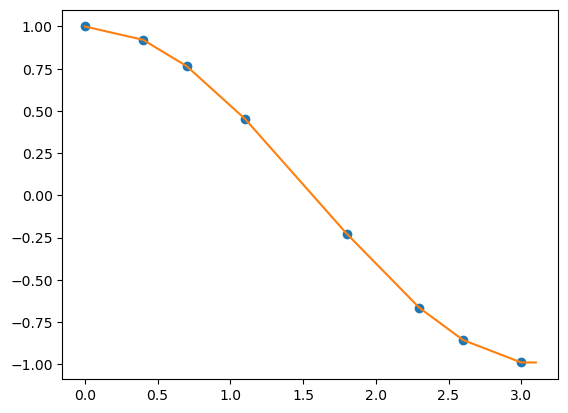

In [71]:
plt.plot(x,f,'o')
plt.plot(xi,fi)

## scipy

In [72]:
# scipy para operações numérica
import scipy as sp  # scipy básico

In [73]:
# funções especiais
import scipy.special as special 
x = np.arange(0,100,.25)
jofx = special.j0(x) # Função Bessel de ordem zero e primeiro tipo

In [74]:
# lidando com arquivos matlab
import scipy.io as io

In [97]:
ls ../resources/data

WestCoastSaildroneData.txt  coast.mat
WestCoastShoreLine.txt


In [102]:
coastline = io.loadmat('../resources/data/coast.mat')

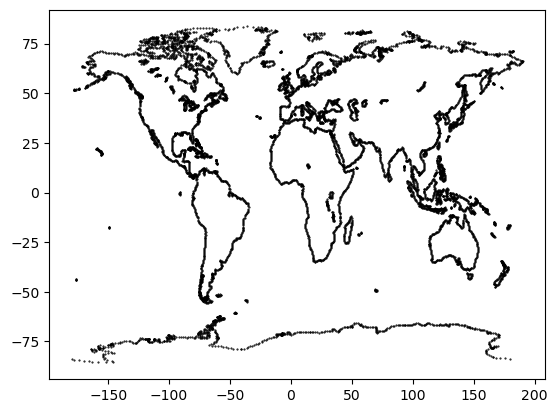

In [110]:
plt.plot(coastline['long'][:],coastline['lat'][:],'k.',markersize=1)

In [108]:
io.savemat('../resources/data/coastline_new.mat',coastline)

In [52]:
# processamento de sinais
import scipy.signal as signal 

In [53]:
# janela de 10 pontos 
hanning_window = signal.hann(10)

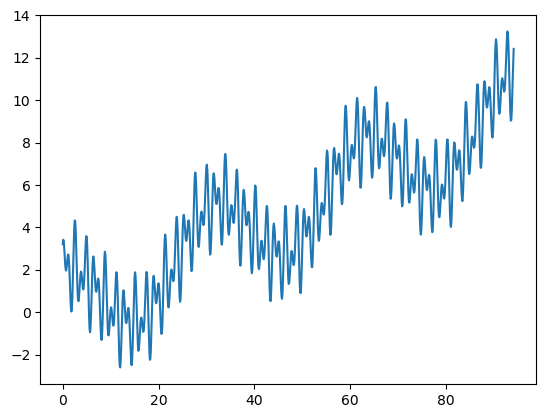

In [55]:
# operações mais avançadas: numpy e scipy trabalham juntos

# vamos criar dados sintéticos
t = np.arange(0,30*np.pi,.1)
f = 0.1*t + 2*np.cos(0.2*t) + 1.2*np.sin(3*t) + 1.2*np.cos(5*t)
plt.plot(t,f)

In [57]:
# removendo a tendência linear
f_detrended = signal.detrend(f)

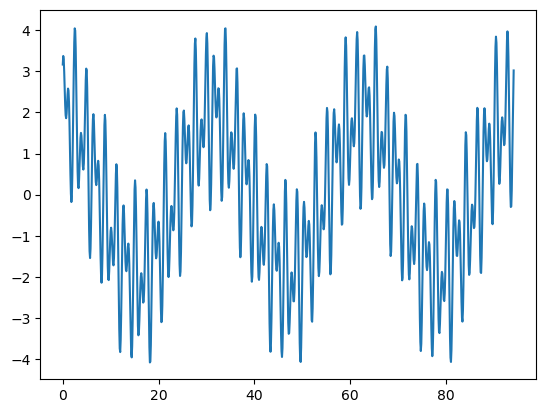

In [58]:
plt.plot(t,f_detrended)

In [61]:
# janela de 100 pontos 
win = signal.hann(100)
win = win/win.sum()

In [64]:
# filtragem simples via convolução do
# da janela com o sinal
f_filtered = np.convolve(f_detrended,win,mode='same')

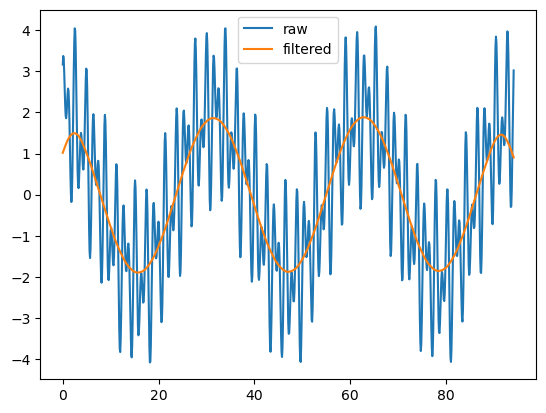

In [65]:
plt.plot(t,f_detrended,label='raw')
plt.plot(t,f_filtered,label='filtered')
plt.legend()